In [5]:
# Import packages
%run create_model.py


'' is not a valid SBML 'SId'.


In [45]:
# Use Flux Scanning based on enforced objective flux to detect 
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

fseof = FSEOF(model)
result = fseof.run(target = model.reactions.ARTA_ex)


In [46]:
df = result.data_frame
df_ori = df.copy()
result

,1,2,3,4,5,6,7,8,9,10
r6,7.704007,7.931084,8.158160,8.385236,8.612312,8.839388,9.066464,9.293541,9.520617,9.747693
r8,7.704007,7.931084,8.158160,8.385236,8.612312,8.839388,9.066464,9.293541,9.520617,9.747693
r19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264519,0.179495,0.094471
r20,1.000228,0.901304,0.802380,0.703457,0.604533,0.505610,0.406686,0.000000,0.000000,0.000000
r25,12.999385,13.170227,13.341069,13.511911,13.682754,13.853596,14.024438,14.195281,14.366123,14.536965
...,...,...,...,...,...,...,...,...,...,...
ADS_reaction,0.252732,0.505464,0.758196,1.010928,1.263660,1.516392,1.769124,2.021856,2.274589,2.527321
CYP1AV1CY/PCPR1/CYB5_reaction,0.252732,0.505464,0.758196,1.010928,1.263660,1.516392,1.769124,2.021856,2.274589,2.527321
ADH1_reaction,0.252732,0.505464,0.758196,1.010928,1.263660,1.516392,1.769124,2.021856,2.274589,2.527321
ALDH1_reaction,0.252732,0.505464,0.758196,1.010928,1.263660,1.516392,1.769124,2.021856,2.274589,2.527321


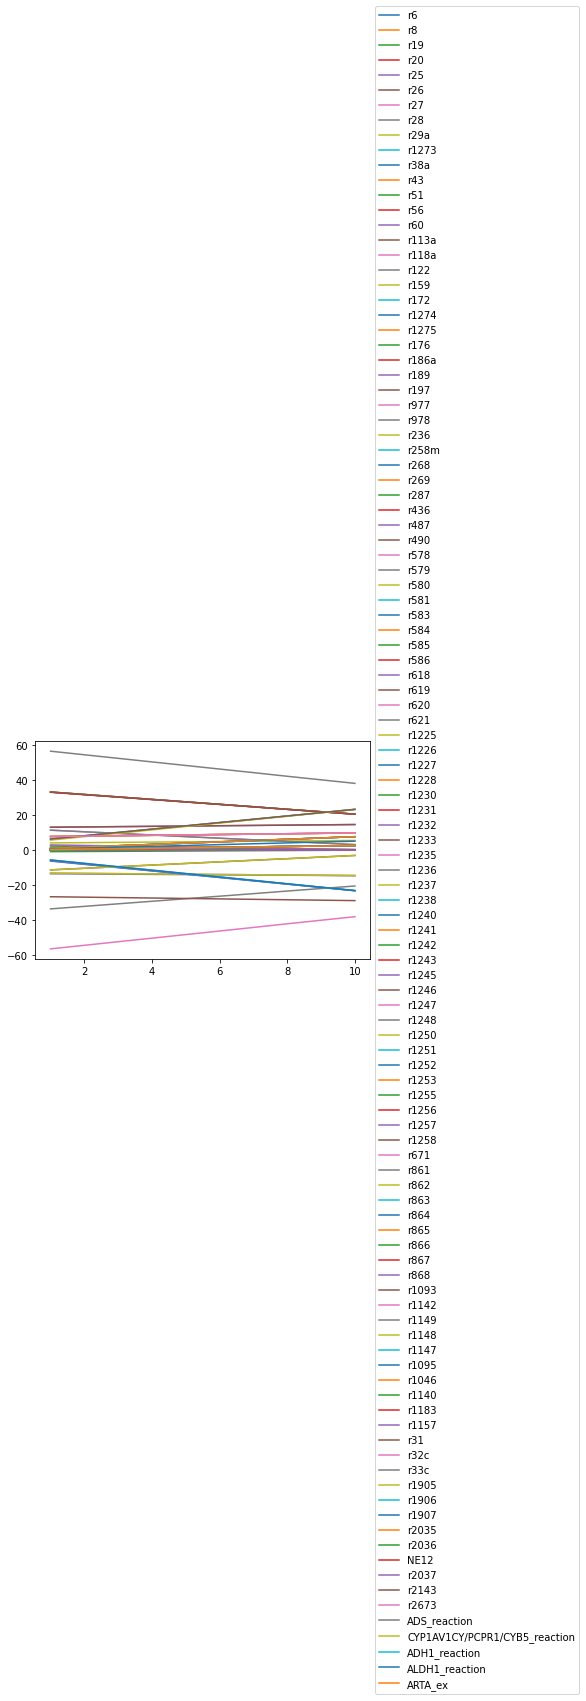

In [47]:
from matplotlib import pyplot as plt
df.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [62]:
from pytest import approx

# sorting the dataframe
df = df.sort_values([1], ascending = False)

# removing genes with zero fluxes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df

,1,2,3,4,5,6,7,8,9,10
r978,56.343361,54.307246,52.271130,50.235015,48.198899,46.162784,44.126668,42.047310,40.025094,38.002878
r1275,33.068997,31.668376,30.267755,28.867134,27.466514,26.065893,24.665272,23.221408,21.834687,20.447965
r172,33.068997,31.668376,30.267755,28.867134,27.466514,26.065893,24.665272,23.221408,21.834687,20.447965
r1274,33.068997,31.668376,30.267755,28.867134,27.466514,26.065893,24.665272,23.221408,21.834687,20.447965
r197,33.068997,31.668376,30.267755,28.867134,27.466514,26.065893,24.665272,23.221408,21.834687,20.447965
...,...,...,...,...,...,...,...,...,...,...
r27,-13.140715,-13.297580,-13.454444,-13.611309,-13.768174,-13.925038,-14.081903,-14.238767,-14.395632,-14.552496
r28,-13.541929,-13.659113,-13.776297,-13.893481,-14.010665,-14.127850,-14.245034,-14.362218,-14.479402,-14.596586
r1093,-26.619220,-26.865612,-27.112005,-27.358397,-27.604789,-27.851182,-28.097574,-28.343967,-28.590359,-28.836752
r122,-33.557417,-32.108491,-30.659565,-29.210639,-27.761712,-26.312786,-24.863860,-23.371691,-21.936664,-20.501638


Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

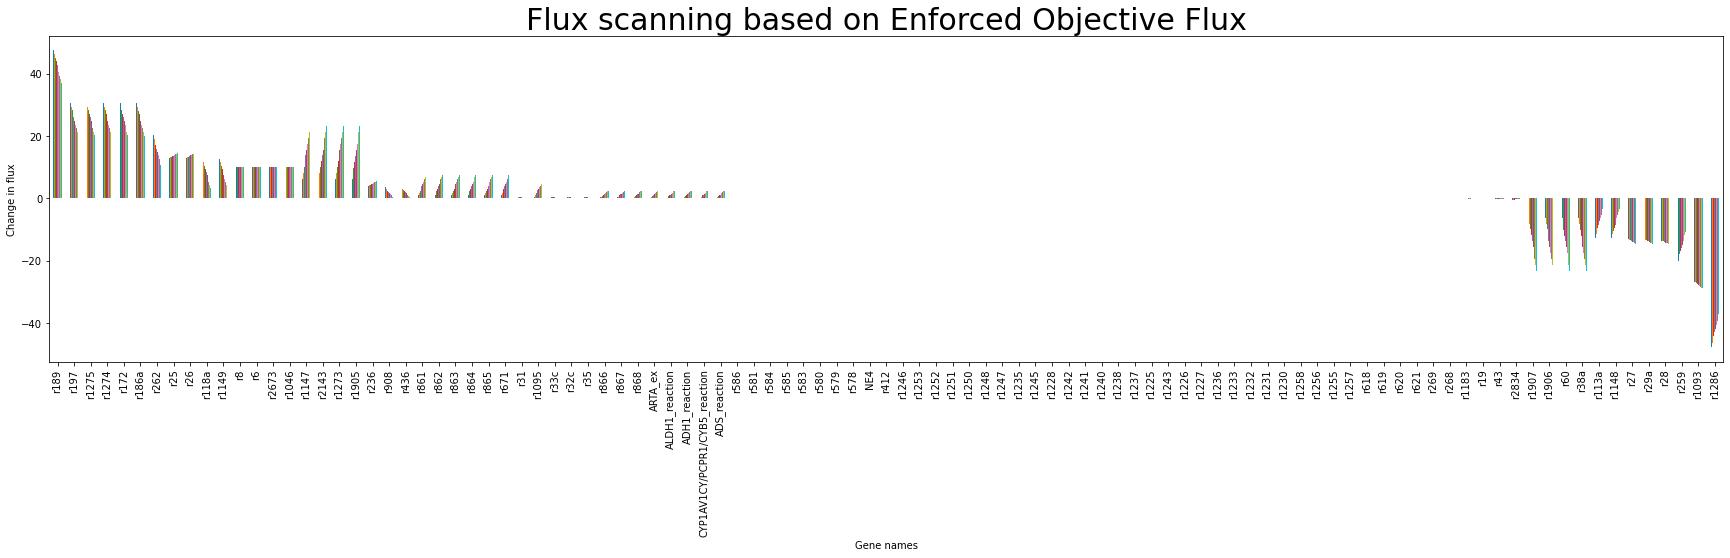

In [21]:
import numpy as np
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot.bar(legend=None,figsize=(30, 6), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [22]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]
target_reactions_df


,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r861,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r862,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r863,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r864,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r865,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r671,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r1095,0.610109,1.105224,1.600338,2.095453,2.590567,3.085682,3.580797,4.075911,4.571026,5.066141,1.879571
r866,0.328167,0.573438,0.818710,1.063981,1.309253,1.554524,1.799796,2.045067,2.290339,2.535610,1.870577
r867,0.328167,0.573438,0.818710,1.063981,1.309253,1.554524,1.799796,2.045067,2.290339,2.535610,1.870577
r868,0.328167,0.573438,0.818710,1.063981,1.309253,1.554524,1.799796,2.045067,2.290339,2.535610,1.870577


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

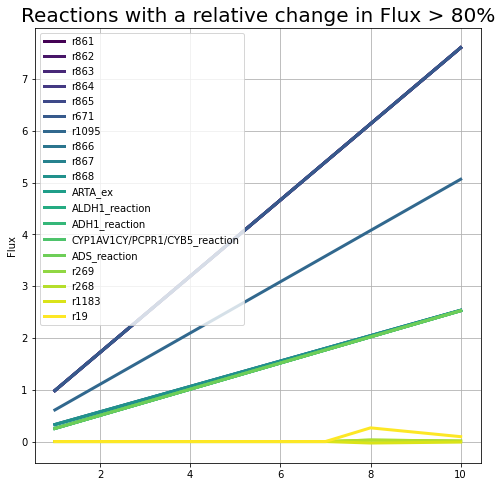

In [23]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)


In [24]:
target_reactions_df.head(10)

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r861,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r862,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r863,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r864,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r865,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r671,0.984500,1.720315,2.456129,3.191943,3.927758,4.663572,5.399387,6.135201,6.871016,7.606830,1.870577
r1095,0.610109,1.105224,1.600338,2.095453,2.590567,3.085682,3.580797,4.075911,4.571026,5.066141,1.879571
r866,0.328167,0.573438,0.818710,1.063981,1.309253,1.554524,1.799796,2.045067,2.290339,2.535610,1.870577
r867,0.328167,0.573438,0.818710,1.063981,1.309253,1.554524,1.799796,2.045067,2.290339,2.535610,1.870577
r868,0.328167,0.573438,0.818710,1.063981,1.309253,1.554524,1.799796,2.045067,2.290339,2.535610,1.870577


In [25]:
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
ADS_reaction,0.252732,0.505464,0.758196,1.010928,1.26366,1.516392,1.769124,2.021856,2.274589,2.527321,1.9
r269,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.028584,0.019396,0.010209,2.0
r268,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.028584,0.019396,0.010209,2.0
r1183,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.028584,-0.019396,-0.010209,2.0
r19,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.264519,0.179495,0.094471,2.0


In [89]:
import pandas as pd
rxn_list = {}

for i in target_reactions_df.index:
    rxn = model.reactions.get_by_id(i)
    rxn_list[i] = [rxn.name, rxn.reaction]

rxn_list = pd.DataFrame(rxn_list).T

me = 'Mevalonate Pathway'
ar = 'Artemisinin Biosynthesis'
co_pathway = [me, me, me, me, me, me, 'Phosphate Exchange', me, me, me, 
              ar, ar, ar, ar, ar, 'Benzoate Degradation', 'Benzoate Degradation', 
              'Arginine Biosynthesis', 'Biotin Synthesis Pathway']
rxn_list['pathway'] = co_pathway

rxn_list.columns = ['Reaction', 'Stoichiometry', 'Pathway']

rxn_list.to_markdown()

'|                               | Reaction                                                                    | Stoichiometry                               | Pathway                  |\n|:------------------------------|:----------------------------------------------------------------------------|:--------------------------------------------|:-------------------------|\n| r861                          | 3-hydroxy-3-methylglutaryl coenzyme A synthase                              | AACCOA + ACCOA + H2O <=> COA + H3MCOA       | Mevalonate Pathway       |\n| r862                          | 3-hydroxy-3-methylglutaryl-coenzyme A (HMG-CoA) reductase isozyme           | H3MCOA + 2.0 NADPH <=> COA + MVL + 2.0 NADP | Mevalonate Pathway       |\n| r863                          | Mevalonate kinase                                                           | ATP + MVL --> ADP + PMVL                    | Mevalonate Pathway       |\n| r864                          | Phosphomevalonate kinase           

In [84]:
model.reactions.r1183

Reaction identifier,r1183
Name,
Memory address,0x07f85240ba760
Stoichiometry,CITR <=> CITRm L-Citrulline <=> L-Citrulline (mitochondrial)
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [28]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()


In [31]:
reference_model = model.copy()
biomass_rxn = reference_model.reactions.DRAIN_Biomass
biomass_rxn.lower_bound = 0.
target = reference_model.metabolites.ARTA_e

In [32]:
diffFVA = DifferentialFVA(design_space_model=model,
                          reference_model=reference_model,
                          objective=target,
                          variables=[biomass_rxn],
                          normalize_ranges_by=biomass_rxn,
                          points=10)

In [33]:
result = diffFVA.run(surface_only=True)
result.solutions

HBox()

,lower_bound,upper_bound,gaps,normalized_gaps,biomass,production,KO,flux_reversal,suddenly_essential,free_flux,reaction,excluded
reaction,,,,,,,,,,,,
ADH1_reaction,0.000000,2.808134,0.000000e+00,NaN,0.000000,1000.0,False,False,False,False,ADH1_reaction,False
ADS_reaction,0.000000,2.808134,0.000000e+00,NaN,0.000000,1000.0,False,False,False,False,ADS_reaction,False
ALDH1_reaction,0.000000,2.808134,0.000000e+00,NaN,0.000000,1000.0,False,False,False,False,ALDH1_reaction,False
ARTA_ex,0.000000,2.808134,0.000000e+00,NaN,0.000000,1000.0,False,False,False,False,ARTA_ex,False
CYP1AV1CY/PCPR1/CYB5_reaction,0.000000,2.808134,0.000000e+00,NaN,0.000000,1000.0,False,False,False,False,CYP1AV1CY/PCPR1/CYB5_reaction,False
...,...,...,...,...,...,...,...,...,...,...,...,...
r988,0.000045,0.000045,-2.917810e-11,-3.104534e-11,0.939855,1000.0,False,False,False,False,r988,False
r989,0.000000,0.000000,0.000000e+00,0.000000e+00,0.939855,1000.0,True,False,False,False,r989,False
r990,0.000000,0.000000,0.000000e+00,0.000000e+00,0.939855,1000.0,True,False,False,False,r990,False
